# Regresión logistica (RL) SU
## Qué es?
La regresión logística es una técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro. Normalmente, la predicción tiene un número finito de resultados, como un sí o un no.
## Fundamentos teóricos y matematicos 



La **regresión logística** es un modelo estadístico utilizado para predecir **probabilidades de pertenencia a una clase** (por ejemplo: *sí/no*, *0/1*). A diferencia de la regresión lineal, la salida no es continua, sino una **probabilidad entre 0 y 1**.

---

### Fórmula de la función sigmoide:

\[
p(x) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + \dots + b_nx_n)}}
\]

- \( p(x) \): probabilidad de que el resultado sea clase 1.
- \( b_0 \): término independiente.
- \( b_i \): coeficientes del modelo.
- \( x_i \): variables de entrada.
- \( e \): número de Euler (~2.718).

---

### Clasificación

Una vez obtenida la probabilidad:

- Si \( p(x) \geq 0.5 \) → se predice **clase 1**
- Si \( p(x) < 0.5 \) → se predice **clase 0**

---

### Entrenamiento del modelo

Los coeficientes se ajustan utilizando un método llamado **máxima verosimilitud**, que busca que las predicciones se acerquen lo más posible a los valores reales del dataset.

---

### En resumen

> La regresión logística permite modelar decisiones binarias basadas en probabilidades. Es ideal cuando se necesita clasificar observaciones como *sí/no*, *positivo/negativo*, *fraude/no fraude*, etc.


## Preprocesamiento


In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [169]:
iris = load_iris()

df = pd.DataFrame(iris.data[:, 2:4], columns=['petal length (cm)', 'petal width (cm)'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)  # reemplaza 0,1,2 por nombres

X = df[['petal length (cm)', 'petal width (cm)']]
Y = df['species']

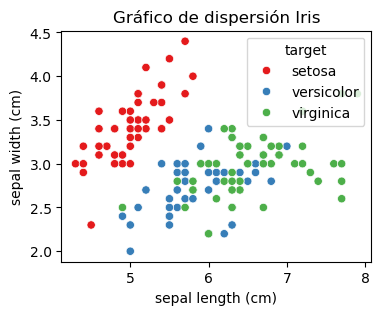

In [170]:
# Cargar datos
iris = load_iris()
df = pd.DataFrame(iris.data[:, :2], columns=['sepal length (cm)', 'sepal width (cm)'])
df['target'] = [iris.target_names[i] for i in iris.target]

# Establecer tamaño de figura
plt.figure(figsize=(4, 3))  # ancho=5, alto=3 en pulgadas

# Gráfico de dispersión
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='Set1')
plt.title('Gráfico de dispersión Iris')
plt.show()

In [171]:
model = LogisticRegression(max_iter=200, solver='lbfgs')

In [ ]:
# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [173]:
# Entrenar el modelo de regresión logística
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

results = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
print(results)

           Real    Predicho
73   versicolor  versicolor
18       setosa      setosa
118   virginica   virginica
78   versicolor  versicolor
76   versicolor  versicolor
31       setosa      setosa
64   versicolor  versicolor
141   virginica   virginica
68   versicolor  versicolor
82   versicolor  versicolor
110   virginica   virginica
12       setosa      setosa
36       setosa      setosa
9        setosa      setosa
19       setosa      setosa
56   versicolor  versicolor
104   virginica   virginica
69   versicolor  versicolor
55   versicolor  versicolor
132   virginica   virginica
29       setosa      setosa
127   virginica   virginica
26       setosa      setosa
128   virginica   virginica
131   virginica   virginica
145   virginica   virginica
108   virginica   virginica
143   virginica   virginica
45       setosa      setosa
30       setosa      setosa


In [174]:
# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

